In [ ]:
from dataset import ImageDataset, load_dataset, scaling
from model import CNN
import torch
from sklearn.metrics import accuracy_score
import pickle

torch.cuda.empty_cache()

# FashionMNIST0.3
## Load dataset

In [ ]:
training_data, training_labels, testing_data, testing_labels = load_dataset('datasets/FashionMNIST0.3.npz')

## Preprocessing

In [ ]:
training_data = scaling(training_data)
testing_data = scaling(testing_data)

T = torch.tensor([[0.7, 0.3, 0.0],
                  [0.0, 0.7, 0.3],
                  [0.3, 0.0, 0.7]], dtype=torch.float32)
train_dataset = ImageDataset(training_data, training_labels, transition_matrix=T)
test_dataset = ImageDataset(testing_data, testing_labels)

## Model Training

In [3]:
prediction_results = []
accuracy_results = []
for round in range(10):
    print(f"----------Training CNN round {round+1}/10----------")
    cnn = CNN(num_classes=3, dataset_name="FashionMNIST0.3")
    cnn.train(train_dataset, round=round)
    y_true, y_pred = cnn.predict(test_dataset)
    prediction_results.append((y_true, y_pred))
    accuracy = accuracy_score(y_true, y_pred)
    accuracy_results.append(accuracy)
    print(f"CNN Test Acc: {accuracy*100:.2f}%")

with open('results/cnn_fashionmnist0.3_pred_results.pkl', 'wb') as f:
    pickle.dump(prediction_results, f)

with open('results/cnn_fashionmnist0.3_acc_results.pkl', 'wb') as f:
    pickle.dump(accuracy_results, f)


----------Training CNN round 1/10----------
Epoch [1/100], Training Loss: 0.6506, Validation Loss: 0.6495, Validation Accuracy: 67.72%
Epoch [2/100], Training Loss: 0.6283, Validation Loss: 0.6333, Validation Accuracy: 68.11%
Epoch [3/100], Training Loss: 0.6224, Validation Loss: 0.6360, Validation Accuracy: 67.94%
Epoch [4/100], Training Loss: 0.6208, Validation Loss: 0.6748, Validation Accuracy: 65.53%
Epoch [5/100], Training Loss: 0.6207, Validation Loss: 0.6438, Validation Accuracy: 67.86%
Epoch [6/100], Training Loss: 0.6204, Validation Loss: 0.7349, Validation Accuracy: 66.11%
Epoch [7/100], Training Loss: 0.6190, Validation Loss: 0.6364, Validation Accuracy: 68.25%
Epoch [8/100], Training Loss: 0.6153, Validation Loss: 0.6379, Validation Accuracy: 67.94%
Epoch [9/100], Training Loss: 0.6165, Validation Loss: 0.6424, Validation Accuracy: 68.22%
Epoch [10/100], Training Loss: 0.6140, Validation Loss: 0.6337, Validation Accuracy: 68.14%
Epoch [11/100], Training Loss: 0.6145, Valida

# FashionMNIST0.6
## Load Dataset

In [4]:
training_data, training_labels, testing_data, testing_labels = load_dataset('datasets/FashionMNIST0.6.npz')
T = torch.tensor([[0.4, 0.3, 0.3],
                  [0.3, 0.4, 0.3],
                  [0.3, 0.3, 0.4]], dtype=torch.float32)
train_dataset = ImageDataset(training_data, training_labels, transition_matrix=T)
test_dataset = ImageDataset(testing_data, testing_labels)

## Model Training

In [5]:
prediction_results = []
accuracy_results = []
for round in range(10):
    print(f"----------Training CNN round {round+1}/10----------")
    cnn = CNN(num_classes=3, dataset_name="FashionMNIST0.6")
    cnn.train(train_dataset, round=round)
    y_true, y_pred = cnn.predict(test_dataset)
    prediction_results.append((y_true, y_pred))
    accuracy = accuracy_score(y_true, y_pred)
    accuracy_results.append(accuracy)
    print(f"CNN Test Acc: {accuracy*100:.2f}%")

with open('results/cnn_fashionmnist0.6_pred_results.pkl', 'wb') as f:
    pickle.dump(prediction_results, f)

with open('results/cnn_fashionmnist0.6_acc_results.pkl', 'wb') as f:
    pickle.dump(accuracy_results, f)

----------Training CNN round 1/10----------
Epoch [1/100], Training Loss: 1.0979, Validation Loss: 1.1082, Validation Accuracy: 33.50%
Epoch [2/100], Training Loss: 1.1036, Validation Loss: 1.0979, Validation Accuracy: 34.58%
Epoch [3/100], Training Loss: 1.0959, Validation Loss: 1.0966, Validation Accuracy: 37.81%
Epoch [4/100], Training Loss: 1.0927, Validation Loss: 1.1030, Validation Accuracy: 34.81%
Epoch [5/100], Training Loss: 1.0924, Validation Loss: 1.0924, Validation Accuracy: 39.58%
Epoch [6/100], Training Loss: 1.0942, Validation Loss: 1.1014, Validation Accuracy: 35.61%
Epoch [7/100], Training Loss: 1.0946, Validation Loss: 1.0974, Validation Accuracy: 37.22%
Epoch [8/100], Training Loss: 1.0921, Validation Loss: 1.1035, Validation Accuracy: 34.83%
Epoch [9/100], Training Loss: 1.0936, Validation Loss: 1.1048, Validation Accuracy: 34.47%
Epoch [10/100], Training Loss: 1.1012, Validation Loss: 1.1035, Validation Accuracy: 34.42%
Epoch [11/100], Training Loss: 1.0939, Valida

# Visualisation

C:\Users\brian\AppData\Local\Temp\ipykernel_95352\344362361.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[i].boxplot(data, labels=models)
C:\Users\brian\AppData\Local\Temp\ipykernel_95352\344362361.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[i].boxplot(data, labels=models)


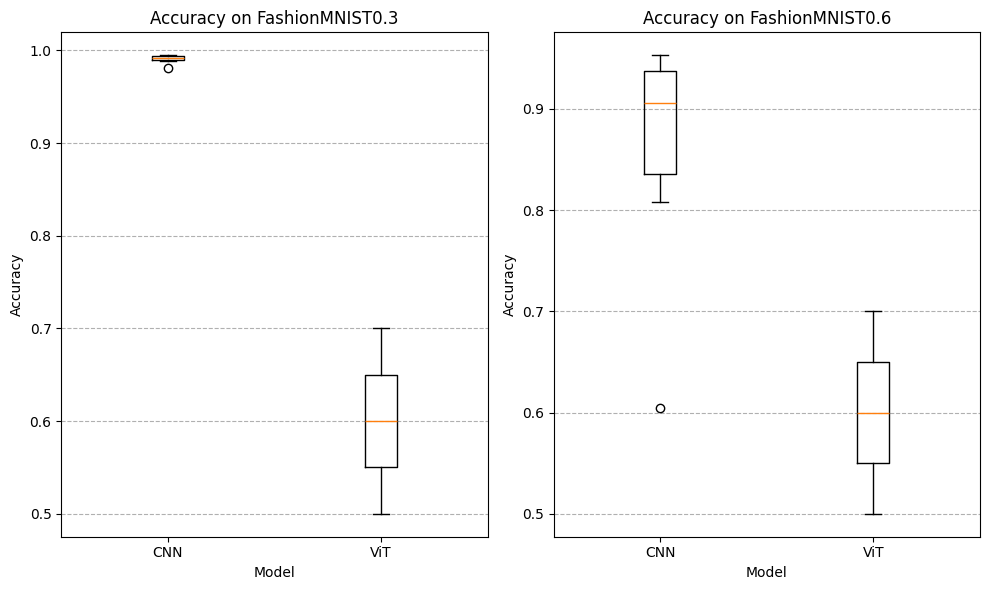

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

with open('results/cnn_fashionmnist0.3_acc_results.pkl', 'rb') as f:
    cnn_acc_03 = pickle.load(f)

with open('results/cnn_fashionmnist0.6_acc_results.pkl', 'rb') as f:
    cnn_acc_06 = pickle.load(f)

datasets = ['FashionMNIST0.3', 'FashionMNIST0.6']
models   = ['CNN', "ViT"]

# For each (dataset, model): list of scores (e.g., accuracies across runs)
results = {
    'FashionMNIST0.3': {'CNN': cnn_acc_03, 'ViT': [0.5,0.6,0.7]},
    'FashionMNIST0.6': {'CNN': cnn_acc_06, 'ViT': [0.5,0.6,0.7]},
}

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
for i, dataset in enumerate(datasets):
    data = [results[dataset][model] for model in models]
    axs[i].boxplot(data, labels=models)
    axs[i].set_title(f'Accuracy on {dataset}')
    axs[i].set_xlabel('Model')
    axs[i].set_ylabel('Accuracy')
    axs[i].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()


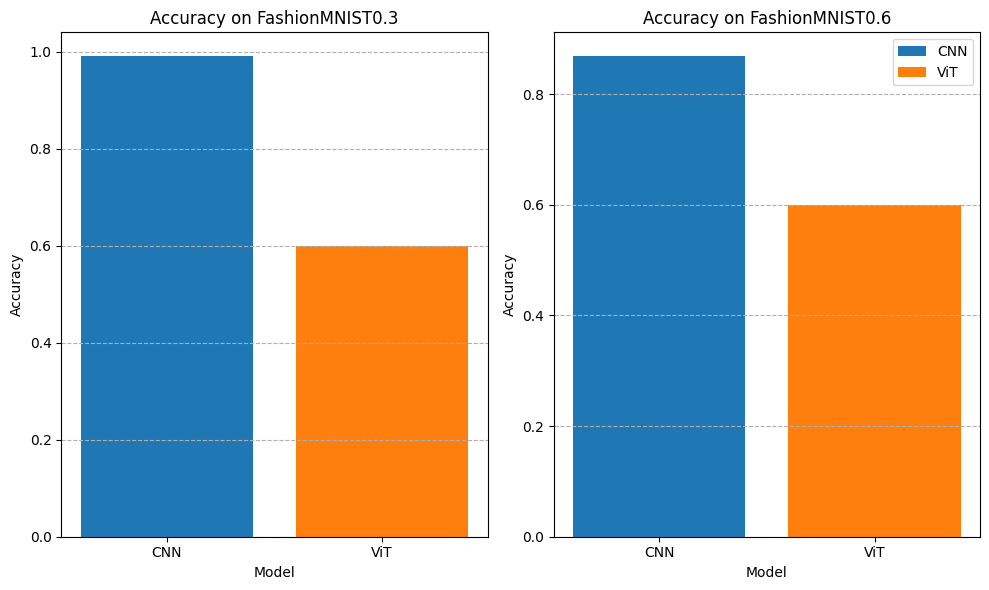

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
for i, dataset in enumerate(datasets):
    data = [np.mean(results[dataset][model]) for model in models]
    axs[i].bar(models, data, label=models, color=['tab:blue', 'tab:orange'])
    axs[i].set_title(f'Accuracy on {dataset}')
    axs[i].set_xlabel('Model')
    axs[i].set_ylabel('Accuracy')
    axs[i].grid(axis='y', linestyle='--')
plt.legend(models)

plt.tight_layout()
plt.show()